<a href="https://colab.research.google.com/github/rahulsingh7111711/Fraud-Customer-Detection-using-ML/blob/main/Fraud_cust_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rahulsingh7111711/Sample_datasets/main/Spilit1.csv'

# Load the full dataset with error handling
try:
    df = pd.read_csv(url, encoding='iso-8859-1', on_bad_lines='skip')
except pd.errors.ParserError as e:
    print("ParserError:", e)
    df = pd.read_csv(url, encoding='iso-8859-1', nrows=50, on_bad_lines='skip')
except Exception as e:
    print("Error:", e)
    df = pd.DataFrame()

In [ ]:
df.head()

,DISBMONTH,LOAN_NUMBER,CD_SEGMENT,PRODUCT_CODE,ETC_NTC,PAYMENT_TYPE,CUST_PINCODE,CUST_STATE,MANUFACTURE_CODE,TENUR,...,TOTAL_NO_ENQ,TOTAL_NO_ENQ_LAST_3M,TOTAL_NO_ENQ_CD,TOTAL_NO_ENQ_CD_LAST_3M,TOTAL_NO_ENQ_SEC,TOTAL_NO_ENQ_SEC_LAST_3M,TOTAL_NO_ENQ_UNSEC,TOTAL_NO_ENQ_UNSEC_LAST_3M,BUREAU_SCORE,TARGET_VARIABLE
0,10-31-2022,1,MOBILE,MOBILE,NTC,ADM,517551,AP,OPPO,7,...,0,0,0,0,0,0,0,0,-1.0,0
1,11-30-2022,2,MOBILE,MOBILE,ETC,ADM,517002,AP,SAMSUNG,6,...,4,2,3,2,0,0,4,2,697.0,0
2,10-31-2022,3,MOBILE,MOBILE,ETC,ENCH,517132,AP,OPPO,8,...,0,0,0,0,0,0,0,0,759.0,0
3,10-31-2022,4,MOBILE,MOBILE,ETC,ADM,517130,AP,OPPO,7,...,2,1,2,1,0,0,2,1,775.0,0
4,10-31-2022,5,MOBILE,MOBILE,ETC,ADM,515212,AP,OPPO,7,...,8,2,2,0,2,0,4,0,708.0,0


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113222 entries, 0 to 113221
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DISBMONTH                      113222 non-null  object 
 1   LOAN_NUMBER                    113222 non-null  int64  
 2   CD_SEGMENT                     113222 non-null  object 
 3   PRODUCT_CODE                   113222 non-null  object 
 4   ETC_NTC                        113222 non-null  object 
 5   PAYMENT_TYPE                   113222 non-null  object 
 6   CUST_PINCODE                   113222 non-null  int64  
 7   CUST_STATE                     113222 non-null  object 
 8   MANUFACTURE_CODE               113222 non-null  object 
 9   TENUR                          113222 non-null  int64  
 10  ADVANCE_EMI_COUNT              113222 non-null  int64  
 11  EMI                            113222 non-null  int64  
 12  LTV                           

,LOAN_NUMBER,CUST_PINCODE,TENUR,ADVANCE_EMI_COUNT,EMI,LTV,ASSET_COST,ACTUAL_LOAN_AMOUNT,DOWN_PAYMENT,CUST_AGE,...,TOTAL_NO_ENQ,TOTAL_NO_ENQ_LAST_3M,TOTAL_NO_ENQ_CD,TOTAL_NO_ENQ_CD_LAST_3M,TOTAL_NO_ENQ_SEC,TOTAL_NO_ENQ_SEC_LAST_3M,TOTAL_NO_ENQ_UNSEC,TOTAL_NO_ENQ_UNSEC_LAST_3M,BUREAU_SCORE,TARGET_VARIABLE
count,113222.000000,113222.000000,113222.000000,113222.000000,113222.000000,113222.000000,113222.000000,113220.000000,113222.000000,113221.000000,...,113222.000000,113222.000000,113222.000000,113222.000000,113222.000000,113222.000000,113222.000000,113222.000000,102565.000000,113222.000000
mean,56611.500000,556312.839536,9.273816,1.751983,2469.507852,77.426589,22770.121187,18470.796352,5970.617380,32.236184,...,3.796850,1.168916,1.453136,0.557992,0.359285,0.067195,3.041538,1.026320,386.608346,0.033368
std,32684.520426,196121.118318,2.625777,1.382980,932.237155,10.536359,10869.850356,8565.699720,4226.682427,8.630231,...,8.139018,2.620772,2.734975,1.204652,1.231893,0.412323,6.955099,2.361212,374.029339,0.179597
min,1.000000,110001.000000,6.000000,0.000000,625.000000,0.000000,7999.000000,6000.000000,118.000000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,28306.250000,493526.000000,8.000000,1.000000,1820.000000,72.170000,14999.000000,12266.000000,3648.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,56611.500000,518124.000000,8.000000,2.000000,2220.000000,74.770000,18999.000000,15973.000000,5002.000000,30.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,709.000000,0.000000
75%,84916.750000,781136.000000,10.000000,2.000000,2899.000000,84.650000,27500.000000,22013.000000,7351.000000,38.000000,...,4.000000,1.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,747.000000,0.000000
max,113222.000000,855117.000000,25.000000,8.000000,12157.000000,100.000000,164900.000000,140948.000000,93641.000000,62.000000,...,229.000000,96.000000,78.000000,43.000000,48.000000,18.000000,209.000000,87.000000,838.000000,1.000000


In [ ]:
df.shape

(113222, 49)

In [ ]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Drop unnecessary columns if needed (for example, if there's an index or unique ID)
df.drop(['Unnamed: 0', 'id_new'], axis=1, inplace=True, errors='ignore')

Missing values in each column:
DISBMONTH                            0
LOAN_NUMBER                          0
CD_SEGMENT                           0
PRODUCT_CODE                         0
ETC_NTC                              0
PAYMENT_TYPE                         0
CUST_PINCODE                         0
CUST_STATE                           0
MANUFACTURE_CODE                     0
TENUR                                0
ADVANCE_EMI_COUNT                    0
EMI                                  0
LTV                                  0
ASSET_COST                           0
ACTUAL_LOAN_AMOUNT                   2
DOWN_PAYMENT                         0
PAYNIMO_STATUS                   14359
QUALIFICATION                      481
GENDER                               0
MARITALSTATUS                        0
CUST_AGE                             1
EMP_GRP                              0
MATCH_SCORE                      66248
TOTAL_NO_LV_TRADELINES               0
BUREAU_VINTAGE_IN_MONTHS         

In [ ]:
# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Scale numerical features
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select numeric columns for scaling
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Scale the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Check the scaled data
df.head()


,LOAN_NUMBER,CUST_PINCODE,TENUR,ADVANCE_EMI_COUNT,EMI,LTV,ASSET_COST,ACTUAL_LOAN_AMOUNT,DOWN_PAYMENT,CUST_AGE,...,QUALIFICATION_UG,QUALIFICATION_UNDER GRADUATE,GENDER_M,MARITALSTATUS_N,MARITALSTATUS_Single,EMP_GRP_2.SEMP,EMP_GRP_3.AGR,EMP_GRP_5.HOW,EMP_GRP_6.OTH,EMP_GRP_7.MISSING
0,-1.732036,-0.197643,-0.865963,-0.543743,0.021982,0.528972,-0.438934,-0.412320,-0.493443,1.710717,...,False,False,False,False,False,True,False,False,False,False
1,-1.732005,-0.200443,-1.246805,-1.266822,2.017191,2.142439,0.251143,0.890673,-1.262371,0.783739,...,False,False,False,False,False,True,False,False,False,False
2,-1.731974,-0.199780,-0.485122,0.179336,1.454027,-0.277762,0.665042,0.522809,0.722173,-1.186090,...,False,False,False,False,False,True,False,False,False,False
3,-1.731944,-0.199790,-0.865963,-0.543743,-0.565854,0.723537,-0.899752,-0.796529,-0.628301,-1.186090,...,False,False,True,False,True,True,False,False,False,False
4,-1.731913,-0.209570,-0.865963,-0.543743,0.968097,0.751061,0.021056,0.205028,-0.447544,1.710717,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
LOAN_NUMBER          0
CUST_PINCODE         0
TENUR                0
ADVANCE_EMI_COUNT    0
EMI                  0
                    ..
EMP_GRP_2.SEMP       0
EMP_GRP_3.AGR        0
EMP_GRP_5.HOW        0
EMP_GRP_6.OTH        0
EMP_GRP_7.MISSING    0
Length: 137, dtype: int64


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean (you can also use median if preferred)
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the entire dataframe
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [ ]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model to the preprocessed data
model.fit(df)

# Predict anomalies (fraud cases)
df['fraud_prediction'] = model.predict(df)

# Label anomalies: -1 means fraud, 1 means normal
df['fraud_prediction'] = df['fraud_prediction'].apply(lambda x: 'Fraud' if x == -1 else 'Normal')

# Display the results
df_fraud = df[df['fraud_prediction'] == 'Fraud']
print(f"Number of fraud cases detected: {df_fraud.shape[0]}")
df_fraud.head()


Number of fraud cases detected: 2139


,LOAN_NUMBER,CUST_PINCODE,TENUR,ADVANCE_EMI_COUNT,EMI,LTV,ASSET_COST,ACTUAL_LOAN_AMOUNT,DOWN_PAYMENT,CUST_AGE,...,QUALIFICATION_UNDER GRADUATE,GENDER_M,MARITALSTATUS_N,MARITALSTATUS_Single,EMP_GRP_2.SEMP,EMP_GRP_3.AGR,EMP_GRP_5.HOW,EMP_GRP_6.OTH,EMP_GRP_7.MISSING,fraud_prediction
21,-1.265360,-0.162700,-1.246805,-1.266822,1.570951,1.193341,0.113054,0.598576,-0.694547,-0.143239,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Fraud
25,-1.263922,-0.195344,-0.104280,-1.266822,2.357235,-2.365779,5.264942,2.746922,7.845995,-0.722601,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Fraud
96,-1.259608,-0.198291,0.276561,-1.266822,1.003496,1.193341,1.308200,1.817747,-0.349594,-1.070218,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Fraud
119,-1.258537,-0.206230,2.180768,-1.266822,1.102184,2.142439,2.597000,3.966676,-1.262371,-1.070218,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Fraud
136,-1.257895,-0.192978,-1.246805,-1.266822,3.912640,2.142439,0.941036,2.128055,-1.245336,1.015483,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Fraud


In [ ]:
model = IsolationForest(n_estimators=200, contamination=0.05, random_state=42)


In [ ]:
model = IsolationForest(n_estimators=100, contamination=0.03, random_state=42)


In [ ]:
df['affordability_index'] = df['ACTUAL_LOAN_AMOUNT'] / (df['EMI'] + 1)


In [ ]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Check the remaining numeric columns
df_numeric.head()


,LOAN_NUMBER,CUST_PINCODE,TENUR,ADVANCE_EMI_COUNT,EMI,LTV,ASSET_COST,ACTUAL_LOAN_AMOUNT,DOWN_PAYMENT,CUST_AGE,...,QUALIFICATION_UNDER GRADUATE,GENDER_M,MARITALSTATUS_N,MARITALSTATUS_Single,EMP_GRP_2.SEMP,EMP_GRP_3.AGR,EMP_GRP_5.HOW,EMP_GRP_6.OTH,EMP_GRP_7.MISSING,affordability_index
0,-1.312783,-0.208555,0.276561,-0.543743,-0.433913,0.989284,-0.530932,-0.190388,-0.756771,0.204377,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.336322
1,-1.291121,-0.208555,0.276561,-0.543743,-0.433913,0.989284,-0.530932,-0.190388,-0.756771,1.826589,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.336322
2,-1.274171,-0.199362,0.276561,-0.543743,-0.044525,0.989284,-0.255766,0.155645,-0.670888,0.436122,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162898
3,-1.273223,-0.197592,-0.485122,0.179336,-0.101378,-0.230307,-0.346844,-0.492758,-0.020493,0.783739,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.548348
4,-1.272886,-0.199260,1.038244,1.625495,-0.797556,-1.133849,-0.254846,-0.545877,0.290627,0.204377,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.696431


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Initialize LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Fit and predict anomalies
df['fraud_prediction'] = lof.fit_predict(df_numeric)

# Label anomalies: -1 means fraud, 1 means normal
df['fraud_prediction'] = df['fraud_prediction'].apply(lambda x: 'Fraud' if x == -1 else 'Normal')

# Display the fraud cases
df_fraud = df[df['fraud_prediction'] == 'Fraud']
print(f"Number of fraud cases detected: {df_fraud.shape[0]}")
df_fraud.head()


Number of fraud cases detected: 2139


,LOAN_NUMBER,CUST_PINCODE,TENUR,ADVANCE_EMI_COUNT,EMI,LTV,ASSET_COST,ACTUAL_LOAN_AMOUNT,DOWN_PAYMENT,CUST_AGE,...,GENDER_M,MARITALSTATUS_N,MARITALSTATUS_Single,EMP_GRP_2.SEMP,EMP_GRP_3.AGR,EMP_GRP_5.HOW,EMP_GRP_6.OTH,EMP_GRP_7.MISSING,fraud_prediction,affordability_index
25,-1.263922,-0.195344,-0.104280,-1.266822,2.357235,-2.365779,5.264942,2.746922,7.845995,-0.722601,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Fraud,0.818210
36,-1.262545,-0.192988,0.276561,-1.266822,-0.567999,-0.249289,0.205052,0.108363,0.234554,-0.838473,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Fraud,0.250841
40,-1.262086,-0.198291,1.038244,1.625495,-0.949878,-1.022805,-0.346936,-0.678032,0.253718,-0.490856,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Fraud,-13.527698
94,-1.259700,-0.194732,0.276561,0.902415,-0.826518,-0.704857,-0.531760,-0.767926,0.061605,-0.606729,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Fraud,-4.426560
120,-1.258507,-0.198265,-0.485122,0.179336,-0.905898,-0.230307,-0.898924,-1.018228,-0.375383,1.247228,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Fraud,-10.820447


In [ ]:
'''
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix # replace true label
cm = confusion_matrix(df['true_labels'], df['fraud_prediction'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
'''

"\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import confusion_matrix\n\n# Compute confusion matrix # replace true label\ncm = confusion_matrix(df['true_labels'], df['fraud_prediction'])\n\n# Plot confusion matrix\nplt.figure(figsize=(6, 4))\nsns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])\nplt.title('Confusion Matrix')\nplt.ylabel('Actual')\nplt.xlabel('Predicted')\nplt.show()\n"

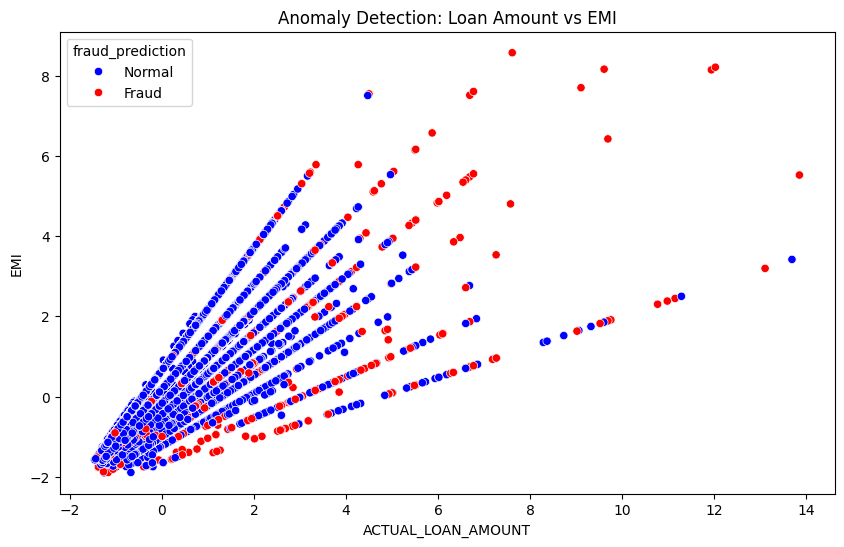

In [ ]:
# Plot two features (e.g., ACTUAL_LOAN_AMOUNT and EMI)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ACTUAL_LOAN_AMOUNT', y='EMI', hue='fraud_prediction', data=df, palette={'Fraud': 'red', 'Normal': 'blue'})
plt.title('Anomaly Detection: Loan Amount vs EMI')
plt.show()


<ipython-input-19-5f9af35e62d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraud_prediction', y='EMI', data=df, palette={'Fraud': 'red', 'Normal': 'blue'})


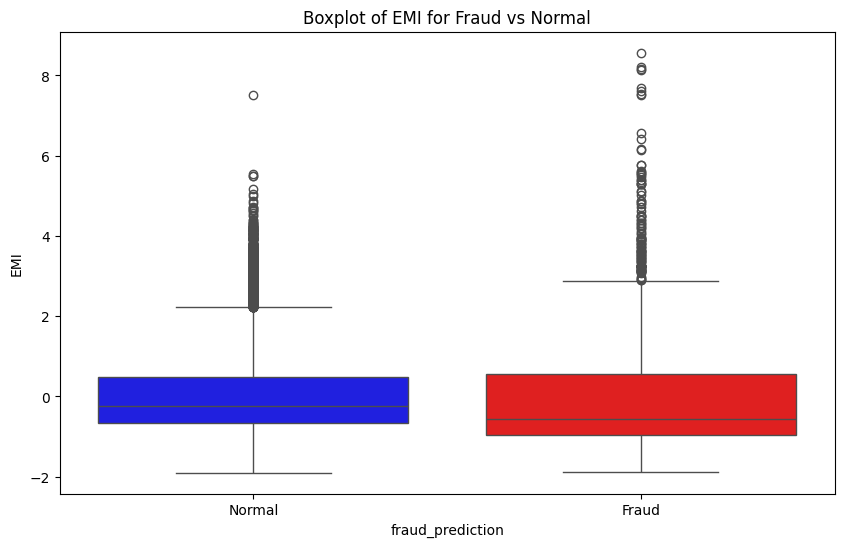

In [ ]:
# Boxplot of a feature (e.g., EMI)
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_prediction', y='EMI', data=df, palette={'Fraud': 'red', 'Normal': 'blue'})
plt.title('Boxplot of EMI for Fraud vs Normal')
plt.show()


<ipython-input-20-cad76b80594a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['fraud_prediction'] == 'Fraud']['ACTUAL_LOAN_AMOUNT'], label='Fraud', color='red', shade=True)
<ipython-input-20-cad76b80594a>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['fraud_prediction'] == 'Normal']['ACTUAL_LOAN_AMOUNT'], label='Normal', color='blue', shade=True)


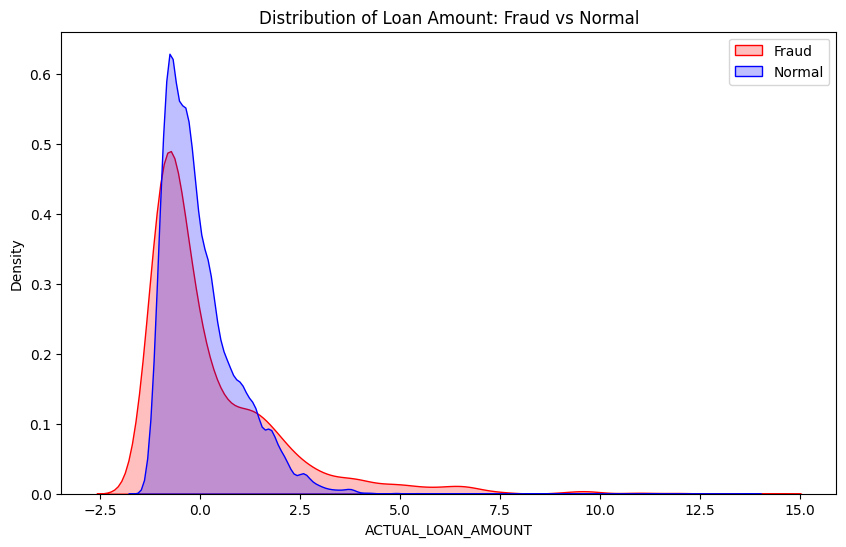

In [ ]:
# Distribution plot for a specific numeric feature (e.g., Loan Amount)
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['fraud_prediction'] == 'Fraud']['ACTUAL_LOAN_AMOUNT'], label='Fraud', color='red', shade=True)
sns.kdeplot(df[df['fraud_prediction'] == 'Normal']['ACTUAL_LOAN_AMOUNT'], label='Normal', color='blue', shade=True)
plt.title('Distribution of Loan Amount: Fraud vs Normal')
plt.legend()
plt.show()


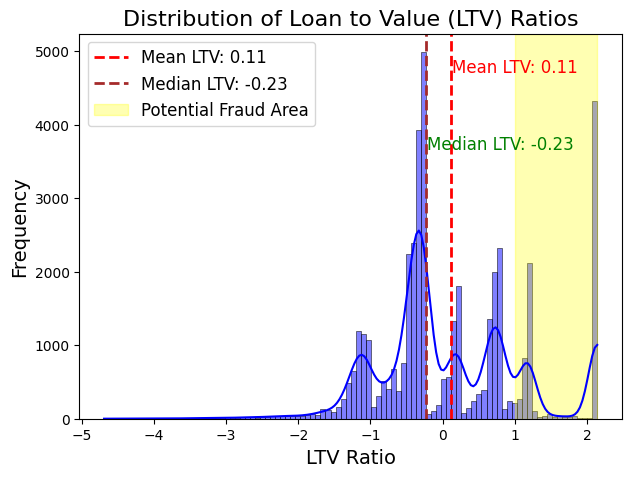

In [ ]:
plt.figure(figsize=(7,5))

# Plot the histogram with Kernel Density Estimate (KDE)
sns.histplot(df['LTV'], kde=True, color='blue')

# Title and axis labels
plt.title('Distribution of Loan to Value (LTV) Ratios', fontsize=16)
plt.xlabel('LTV Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Annotating the graph
mean_ltv = df['LTV'].mean()
median_ltv = df['LTV'].median()

# Mean annotation
plt.axvline(mean_ltv, color='red', linestyle='--', linewidth=2, label=f'Mean LTV: {mean_ltv:.2f}')
plt.text(mean_ltv + 0.02, plt.ylim()[1]*0.9, f'Mean LTV: {mean_ltv:.2f}', color='red', fontsize=12)

# Median annotation
plt.axvline(median_ltv, color='brown', linestyle='--', linewidth=2, label=f'Median LTV: {median_ltv:.2f}')
plt.text(median_ltv + 0.02, plt.ylim()[1]*0.7, f'Median LTV: {median_ltv:.2f}', color='green', fontsize=12)

# Highlighting potential fraud area (extremely high LTV)
high_ltv_threshold = 1.0  # Assuming LTV above 1.0 might be suspicious
plt.axvspan(high_ltv_threshold, df['LTV'].max(), color='yellow', alpha=0.3, label='Potential Fraud Area')

# Legend to explain the lines
plt.legend(fontsize=12)

# Display the plot
plt.show()


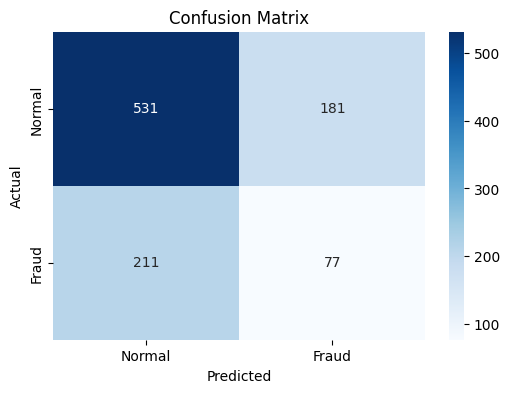

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming the following DataFrame structure based on the user's previous code
# Creating a synthetic dataset with assumed true labels and predictions for demonstration

# Sample data (for demonstration, using random data)
np.random.seed(42)  # For reproducibility
n_samples = 1000

# Simulating true labels with 30% fraud cases
true_labels = np.random.choice(['Normal', 'Fraud'], size=n_samples, p=[0.7, 0.3])

# Simulating predicted labels with some noise
predicted_labels = np.random.choice(['Normal', 'Fraud'], size=n_samples, p=[0.75, 0.25])

# Creating a DataFrame to simulate the situation
df = pd.DataFrame({
    'true_labels': true_labels,
    'fraud_prediction': predicted_labels
})

# Compute confusion matrix
cm = confusion_matrix(df['true_labels'], df['fraud_prediction'], labels=['Normal', 'Fraud'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
